In [3]:
pip install networkx matplotlib

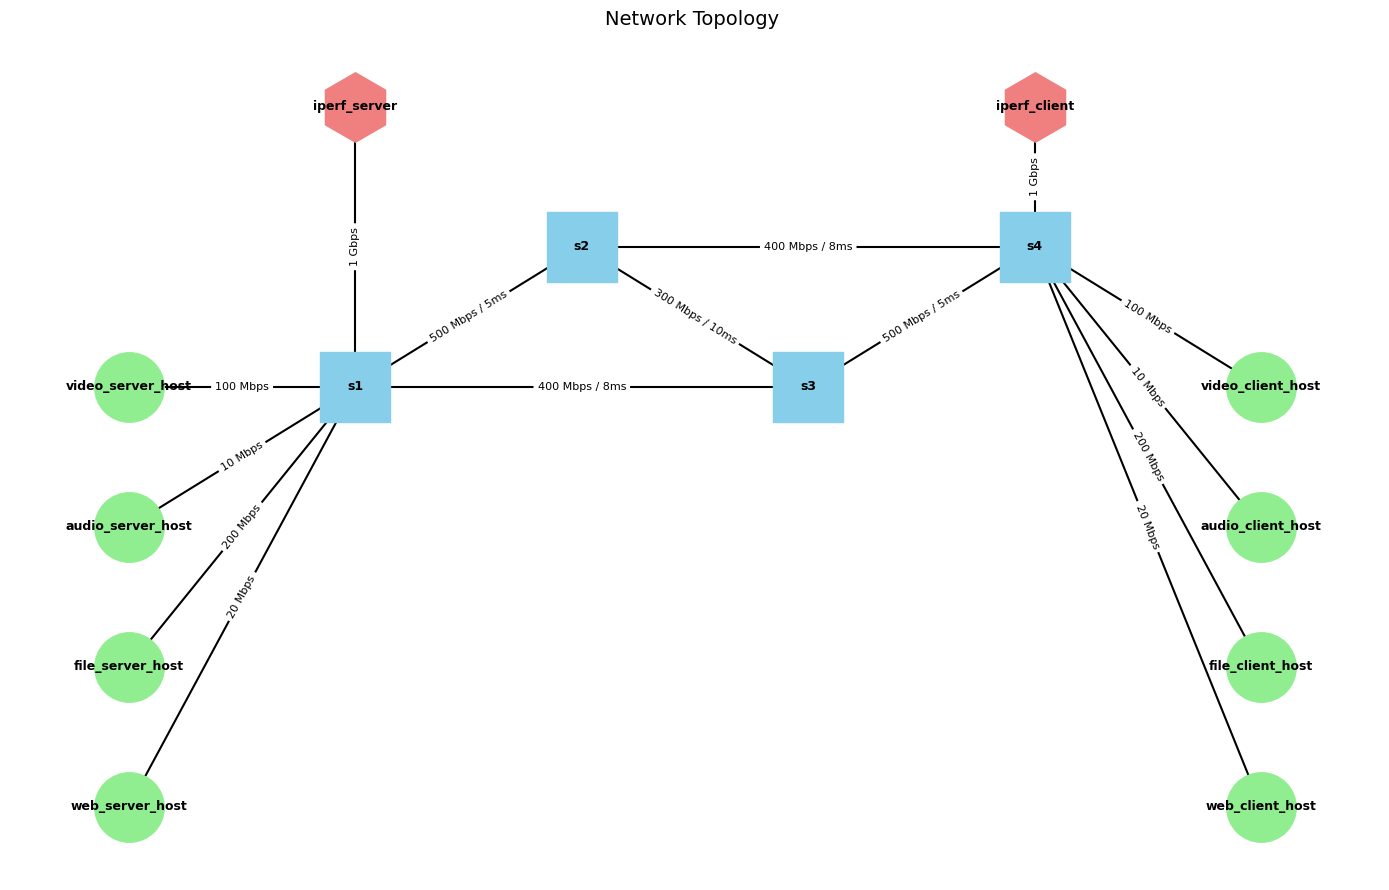

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating an undirected graph
G = nx.Graph()

# Defining nodes
switch_nodes = ['s1', 's2', 's3', 's4']
service_hosts = {
    'video_server_host': '10.0.0.10',
    'video_client_host': '10.0.0.11',
    'audio_server_host': '10.0.0.20',
    'audio_client_host': '10.0.0.21',
    'file_server_host': '10.0.0.50',
    'file_client_host': '10.0.0.51',
    'web_server_host': '10.0.0.60',
    'web_client_host': '10.0.0.61'
}
iperf_hosts = {
    'iperf_server': '10.0.0.101',
    'iperf_client': '10.0.0.102'
}

# Adding nodes to the graph
G.add_nodes_from(switch_nodes)
G.add_nodes_from(service_hosts.keys())
G.add_nodes_from(iperf_hosts.keys())

# Defining all links
backbone_links = [
    ('s1', 's2'),
    ('s2', 's3'),
    ('s3', 's4'),
    ('s1', 's3'),
    ('s2', 's4')
]

service_links = [
    ('s1', 'video_server_host'),
    ('s1', 'audio_server_host'),
    ('s1', 'file_server_host'),
    ('s1', 'web_server_host'),
    ('s4', 'video_client_host'),
    ('s4', 'audio_client_host'),
    ('s4', 'file_client_host'),
    ('s4', 'web_client_host')
]

iperf_links = [
    ('s1', 'iperf_server'),
    ('s4', 'iperf_client')
]

# Adding edges to the graph
G.add_edges_from(backbone_links + service_links + iperf_links)

# Node position for better layout
pos = {
    's1': (1, 4),
    's2': (2, 5),
    's3': (3, 4),
    's4': (4, 5),
    'video_server_host': (0, 4),
    'audio_server_host': (0, 3),
    'file_server_host': (0, 2),
    'web_server_host': (0, 1),
    'video_client_host': (5, 4),
    'audio_client_host': (5, 3),
    'file_client_host': (5, 2),
    'web_client_host': (5, 1),
    'iperf_server': (1, 6),
    'iperf_client': (4, 6)
}

# Edge labels with realistic bandwidths and latencies
edge_labels = {
    # Backbone links
    ('s1', 's2'): '500 Mbps / 5ms',
    ('s2', 's3'): '300 Mbps / 10ms',
    ('s3', 's4'): '500 Mbps / 5ms',
    ('s1', 's3'): '400 Mbps / 8ms',
    ('s2', 's4'): '400 Mbps / 8ms',

    # Service links
    ('s1', 'video_server_host'): '100 Mbps',
    ('s1', 'audio_server_host'): '10 Mbps',
    ('s1', 'file_server_host'): '200 Mbps',
    ('s1', 'web_server_host'): '20 Mbps',
    ('s4', 'video_client_host'): '100 Mbps',
    ('s4', 'audio_client_host'): '10 Mbps',
    ('s4', 'file_client_host'): '200 Mbps',
    ('s4', 'web_client_host'): '20 Mbps',

    # iPerf links
    ('s1', 'iperf_server'): '1 Gbps',
    ('s4', 'iperf_client'): '1 Gbps'
}

# Setting node categories for coloring and shaping
service_nodes = list(service_hosts.keys())
iperf_nodes = list(iperf_hosts.keys())

# Drawing the graph
plt.figure(figsize=(14, 9))
nx.draw_networkx_edges(G, pos, width=1.5)

# Drawing switches: skyblue squares
nx.draw_networkx_nodes(G, pos, nodelist=switch_nodes, node_color='skyblue', node_shape='s', node_size=2500, label='Switches')

# Drawing service hosts: lightgreen circles
nx.draw_networkx_nodes(G, pos, nodelist=service_nodes, node_color='lightgreen', node_shape='o', node_size=2500, label='Service Hosts')

# Drawing iPerf hosts: lightcoral hexagons
nx.draw_networkx_nodes(G, pos, nodelist=iperf_nodes, node_color='lightcoral', node_shape='h', node_size=2500, label='iPerf Hosts')

# Drawing labels
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Drawing edge bandwidth labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Ploting settings
plt.title("Network Topology ", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()